You can get a category from the `Category` enumerator with the following code. The `Category` enumerator has all the categories provided by the QuickDraw dataset. I strongly recommend using this tool, otherwise you can use a string instead, with the danger of making a typo in the process.

In [1]:
from quick_torch import Category

Category.THE_EIFFEL_TOWER

<Category.THE_EIFFEL_TOWER: 'The Eiffel Tower'>

You can create an instance of `QuickDraw` with the following code. You can specify the category, get the recognized data, download the dataset and transform the images.

In [2]:
from quick_torch import QuickDraw
import torchvision.transforms as T


ds = QuickDraw(
    root="dataset", 
    categories=Category.FACE, 
    download=True, 
    transform=T.Resize((128, 128))
)
print(f"{len(ds) = }")
first_data = ds[0]
first_data


len(ds) = 161666


(<PIL.Image.Image image mode=L size=128x128>, 108)

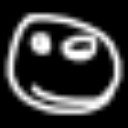

In [3]:
first_data[0]

As you can see, the data comes with an image and a target. Here are another example using a string in the category.


len(ds) = 123202


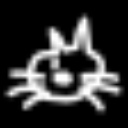

In [4]:
ds = QuickDraw(
    root="dataset", 
    categories="cat", 
    download=True, 
    transform=T.Resize((128, 128))
)
print(f"{len(ds) = }")
ds[0][0]

You can also provide a list of categories to obtain a dataset with those categories.

len(ds) = 284868
Category of face: 108.
Category of cat: 64


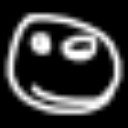

In [5]:
ds = QuickDraw(
    root="dataset", 
    categories=[Category.FACE, "cat"], 
    download=True, 
    transform=T.Resize((128, 128))
)
print(f"{len(ds) = }")
face, cat = ds[0], ds[-1]
print(f"Category of face: {face[1]}.\nCategory of cat: {cat[1]}")
face[0]

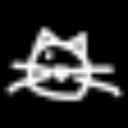

In [6]:
cat[0]

You can use only "recognized" data by choosing the `recognized` parameter. This means that the Google neural network recognized that image in the game (and therefore, it will be of better "quality"). By default, this parameter is `None` (i.e. it returns the entire data set).


len(ds) = 20171


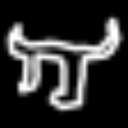

In [7]:
ds = QuickDraw(
    root="dataset", 
    categories="cat", 
    recognized=False, 
    download=True, 
    transform=T.Resize((128, 128))
)
print(f"{len(ds) = }")
ds[0][0]

You can split the data set into train or test with the `train` parameter. This option uses the `train_percentage` parameter to define which training percentage to use. In addition, you can define the seed with the `seed` parameter for reproducibility. By default this seed is kept fixed with a given value.

len(ds_train) = 110881, len(ds_test) = 12321


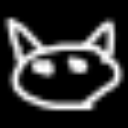

In [8]:
ds_train = QuickDraw(
    root="dataset", 
    categories="cat", 
    transform=T.Resize((128, 128)),
    train=True,
    train_percentage=0.9,
    seed=42,
)
ds_test = QuickDraw(
    root="dataset", 
    categories="cat", 
    transform=T.Resize((128, 128)),
    train=False,
    train_percentage=0.9,
    seed=42,
)
print(f"{len(ds_train) = }, {len(ds_test) = }")
ds_test[0][0]

Finally, you can choose the maximum number of images per class with the `max_items_per_class` parameter. This is useful if you want to use more than one category. In the next cell there is an example.

In [9]:
ds = QuickDraw(
    root="dataset", 
    categories=list(Category)[:5],
    max_items_per_class=10_000,
    download=True,
    transform=T.Resize((128, 128)),
)

In [10]:
len(ds)

50000